In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('movie_reviews.csv')

# Display the first few rows of the dataset
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    tokens = word_tokenize(text.lower())
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['clean_review'] = df['review'].apply(preprocess_text)

print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        clean_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


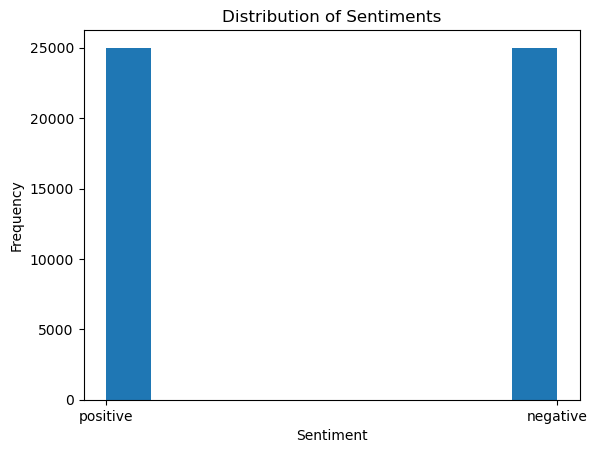

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of review sentiments
plt.hist(df['sentiment'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned reviews
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_review']).toarray()

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_features.shape)


Shape of TF-IDF matrix: (50000, 1000)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['sentiment'], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (40000, 1000) (40000,)
Testing set shape: (10000, 1000) (10000,)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Predict sentiment labels for the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8629
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [11]:
import pickle

# Save the model to disk
with open('sentiment_analysis_model.pkl', 'wb') as f:
    pickle.dump(model, f)


testing the model

In [19]:
import pickle

# Load the trained model
with open('sentiment_analysis_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Sample movie reviews
reviews = [
    "This movie was fantastic! I loved every moment of it.",
    "The acting was terrible and the plot was boring.",
    "I'm not sure how I feel about this movie. It was okay, I guess.",
    "An absolute masterpiece. A must-watch for all movie lovers.",
]

# Preprocess the reviews
clean_reviews = [preprocess_text(review) for review in reviews]

# Extract features using TF-IDF vectorizer
tfidf_features_test = tfidf_vectorizer.transform(clean_reviews).toarray()

# Predict sentiment labels
predicted_sentiments = model.predict(tfidf_features_test)

# Map sentiment labels to human-readable form
sentiment_mapping = {1: "Positive", 0: "Negative"}

# Print predictions
for review, sentiment in zip(reviews, predicted_sentiments):
    print("Review:", review)
    print("Predicted Sentiment:", sentiment_mapping[sentiment])
    print()


Review: This movie was fantastic! I loved every moment of it.


KeyError: 'positive'